# Wilmart Project
Analysis walmart sales dataset for business decision need. This project is in jedha certfication #block4

In [31]:
# import
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [32]:
# sns 
color_palette = ['#265952', '#DFCEEB', '#DBDE2F', '#45201E', '#c7ac92', '#a44a3f']
sns.set_palette(sns.color_palette(color_palette))

## EDA

### general statistics

In [33]:
## read dataset
dataset_file = "../data/raw/Walmart_Store_sales.csv"
walmart_df = pd.read_csv(dataset_file)
display(walmart_df.sample(2))

# info
display(walmart_df.info())

# describe
display(walmart_df.describe(include="all"))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
25,17.0,12-10-2012,919878.34,0.0,44.82,3.797,131.108333,5.527
53,14.0,25-03-2011,1879451.23,NaN,41.76,3.625,184.994368,8.549


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [34]:
display(walmart_df.head(10))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


#### graph, figures

,Store id,Weekly sales by store
0,1,11
1,2,8


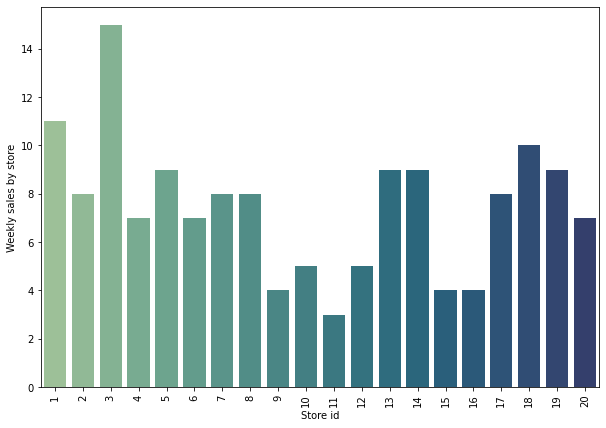

In [41]:
# store
walmart_store_df = pd.DataFrame(walmart_df.groupby(["Store"]).size()).reset_index()
walmart_store_df = walmart_store_df.rename(columns={0: "Weekly sales by store",
                                                    "Store" : "Store id"})
walmart_store_df["Store id"] = walmart_store_df["Store id"].astype(int)
display(walmart_store_df.head(2))

# graph
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Store id", y="Weekly sales by store", data=walmart_store_df, palette="crest")
ax.tick_params(axis='x', rotation=90)
plt.show()

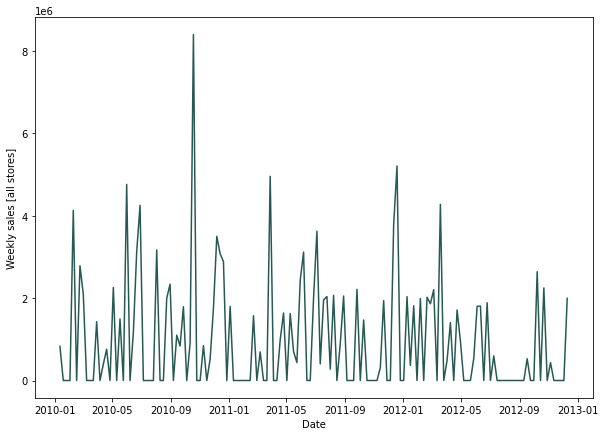

In [72]:
# weekly_sales : time series
walmart_sales_df = walmart_df[["Date", "Store", "Weekly_Sales"]].copy()
walmart_sales_df["Date"] = pd.to_datetime(walmart_sales_df["Date"])

# group by week
walmart_sales_df = walmart_sales_df.resample('W-Mon', on='Date') \
                                   .sum() \
                                   .drop(columns=["Store"])
walmart_sales_df = walmart_sales_df.rename(columns={"Weekly_Sales": "Weekly sales [all stores]"})

# graph 
plt.figure(figsize=(10,7))
sns.lineplot(x="Date", y="Weekly sales [all stores]", data = walmart_sales_df, palette="crest")
ax.tick_params(axis='x', rotation=90)
plt.show()


## Data preprocessing

#### pandas preprocessing

**Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

#### sklearn preprocessing

**Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek